In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
os.getcwd()


'/home/vizziwo/capcookie/models/archivemac'

In [5]:
X_train = pd.read_csv('../../data/processed/X2_train.csv', index_col=0)
X_test = pd.read_csv('../../data/processed/X2_test.csv', index_col=0)
y_train = pd.read_csv('../../data/processed/y2_train.csv', index_col=0)
y_test = pd.read_csv('../../data/processed/y2_test.csv', index_col=0)

In [6]:
X_train.head()

,signs_of_mental_illness,body_camera,gender_F,gender_M,threat_level_attack,threat_level_not_attack,threat_level_unspecified,flee_Car,flee_Foot,flee_Not fleeing,...,armed_knife,armed_machete,armed_other,armed_sword,armed_toy weapon,armed_unarmed,armed_undetermined,armed_unknown weapon,armed_vehicle,standardized_age
2835,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-1.533369
1157,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.501482
744,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.266692
1448,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0.579746
3339,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-0.907261


SUPERVISED LEARNING

After the unsupervised attempt, I think that anything besides a decision tree-based model will probably not work since most of my data is binary. 

But I'm not sure when an SVM is appropriate so I want to try it out, first

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[469 208]
 [204 344]]
0.6636734693877551
0.6254545454545455


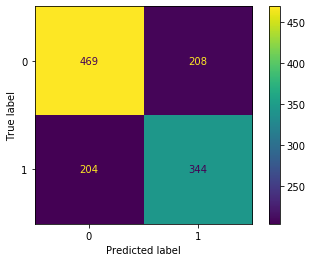

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_confusion_matrix, f1_score, recall_score

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm=svm.score(X_test,y_test)
f1_svm = f1_score(y_test, y_predict_svm)
recall_svm = recall_score(y_test, y_predict_svm)
auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:,1])

print(Accuracy_svm)
print(f1_score(y_test, y_predict_svm))
#svm.predict_proba(X_test)
#gave me this error: AttributeError: predict_proba is not available when  probability=False

#I don't know how to do roc_auc_score for SVM then
plot_confusion_matrix(svm, X_test, y_test)

In [8]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[0.57142857 0.55769231 0.625      0.60425532 0.55299539]
Mean cross validation test score: 0.5822743179949768
Mean cross validation train score: 0.6334123328874239
Standard deviation in cv scores: 0.02788479617396476


TRYING DUMMY CLASSIFIER

Because my data is imbalanced

In [9]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)


DummyClassifier(random_state=42, strategy='most_frequent')

Accuracy: 0.5526530612244898
[[677   0]
 [548   0]]
ROC_AUC: 0.5


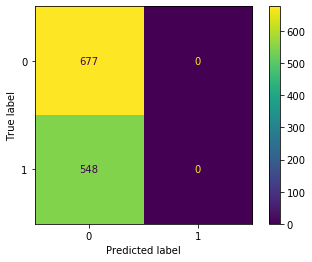

In [10]:
y_predict_dummy = dummy.predict(X_test)
print('Accuracy:', dummy.score(X_test, y_test))
print(confusion_matrix(y_test, y_predict_dummy))
plot_confusion_matrix(dummy, X_test, y_test)
predprob = dummy.predict_proba(X_test)[:,1]
print('ROC_AUC:', roc_auc_score(y_test, predprob))
f1_dum = f1_score(y_test, y_predict_dummy)
recall_dum = recall_score(y_test, y_predict_dummy)
auc_dum = roc_auc_score(y_test, dummy.predict_proba(X_test)[:,1])

In [11]:
cv_scores_test= cross_val_score(dummy,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(dummy,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_dum_test= cv_scores_test.mean()
cv_scores_dum_train= cv_scores_train.mean()
cv_scores_std_dum= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_dum_test))
print ('Mean cross validation train score: ' +str(cv_scores_dum_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_dum))

[0. 0. 0. 0. 0.]
Mean cross validation test score: 0.0
Mean cross validation train score: 0.0
Standard deviation in cv scores: 0.0


The SVM does ok compared to this, given ROC_AUC. 0.5 compared to 0.67.

RANDOM FOREST

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.6416326530612245
ROC_AUC: 0.6813590982113016


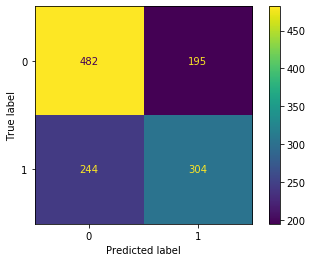

In [12]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='gini')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
plot_confusion_matrix(rf, X_test, y_test)
predprob = rf.predict_proba(X_test)[:,1]

Accuracy_rf=rf.score(X_test,y_test)
f1_rf = f1_score(y_test, y_predict_rf)
recall_rf = recall_score(y_test, y_predict_rf)
auc_rf = roc_auc_score(y_test, predprob)

print('Accuracy:', Accuracy_rf)
print('ROC_AUC:', roc_auc_score(y_test, predprob))




In [13]:
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531:

[0.54455446 0.53731343 0.57142857 0.5410628  0.52968037]
Mean cross validation test score: 0.5448079253878214
Mean cross validation train score: 0.5916312833419493
Standard deviation in cv scores: 0.014196897444543825


/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6579591836734694


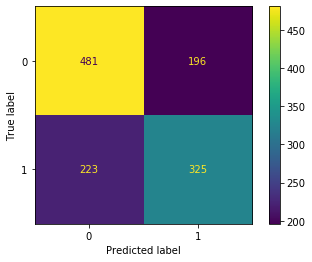

In [14]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)

predprob = gbc.predict_proba(X_test)[:,1]

Accuracy_gbc=gbc.score(X_test,y_test)
f1_gbc = f1_score(y_test, y_predict_gbc)
recall_gbc = recall_score(y_test, y_predict_gbc)
auc_gbc = roc_auc_score(y_test, predprob)



print(Accuracy_gbc)
plot_confusion_matrix(gbc, X_test, y_test)

In [15]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[0.52380952 0.52427184 0.58181818 0.57798165 0.55752212]
Mean cross validation test score: 0.5530806651115705
Mean cross validation train score: 0.6004516516473274
Standard deviation in cv scores: 0.025109274734446973


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    Logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = Logreg.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = f1_score(y_test,y_pred_lr)
    j += 1
    
print(table)

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

   C_parameter  Accuracy
0        0.001   0.43787
1        0.010  0.583886
2        0.100  0.632163
3        1.000  0.649139
4       10.000   0.64202
5      100.000  0.649327


/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
lr = LogisticRegression(penalty = 'l2', C = 0.1,random_state = 40)
lr.fit(X_train, y_train)

predprob = lr.predict_proba(X_test)[:,1]
y_predict_lr = lr.predict(X_test)
Accuracy_lr=lr.score(X_test,y_test)
f1_lr = f1_score(y_test, y_predict_lr)
recall_lr = recall_score(y_test, y_predict_lr)
auc_lr = roc_auc_score(y_test, predprob)

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
cv_scores_test= cross_val_score(lr,X_test,y_test,cv=5,scoring='f1')
cv_scores_train= cross_val_score(lr,X_train,y_train,cv=5,scoring='f1')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_lr))

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[0.5388601  0.51960784 0.5915493  0.56038647 0.57142857]
Mean cross validation test score: 0.5563664574794738
Mean cross validation train score: 0.6182602390592858
Standard deviation in cv scores: 0.025054053839377213


/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
models = ['dummy', 'svm', 'rf', 'gbc', 'lr']
auc = [auc_dum, auc_svm, auc_rf, auc_gbc, auc_lr]
recall = [recall_dum, recall_svm, recall_rf, recall_gbc, recall_lr]
cv_f1_train = [cv_scores_dum_train, cv_scores_svm_train, cv_scores_rf_train, cv_scores_gbc_train, cv_scores_lr_train]
cv_f1_test = [cv_scores_dum_test, cv_scores_svm_test, cv_scores_rf_test, cv_scores_gbc_test, cv_scores_lr_test]

df = pd.DataFrame(list(zip(models, auc, recall, cv_f1_train, cv_f1_test)),
                 columns = ['Model', 'AUC Score', 'Recall Score', 'CV F1 Scores: Train', 'CV F1 Scores: Test'])
df

,Model,AUC Score,Recall Score,CV F1 Scores: Train,CV F1 Scores: Test
0,dummy,0.500000,0.000000,0.000000,0.000000
1,svm,0.717439,0.627737,0.633412,0.582274
2,rf,0.681359,0.554745,0.591631,0.544808
3,gbc,0.700229,0.593066,0.600452,0.553081
4,lr,0.714593,0.624088,0.618260,0.556366


LOOKING AT COEFFICIENTS OF DIFFERENT FEATURES

In [20]:
x = svm.coef_.argsort()[0, -30:]

In [21]:
X_train.columns[x]

Index(['armed_unarmed', 'manner_of_death_shot_and_tasered', 'state_AZ',
       'armed_other', 'armed_vehicle', 'state_NC', 'flee_Foot', 'gender_F',
       'state_AL', 'state_CT', 'body_camera', 'state_MA', 'armed_Taser',
       'state_VA', 'state_GA', 'gender_M', 'state_NV', 'state_PA', 'state_FL',
       'state_TX', 'state_RI', 'armed_machete', 'state_LA', 'state_IL',
       'state_CA', 'state_MD', 'state_NY', 'state_NJ', 'state_DC', 'state_NM'],
      dtype='object')

In [22]:
y = lr.coef_.argsort()[0, -30:]

In [23]:
X_train.columns[y]

Index(['armed_gun', 'state_AL', 'state_CT', 'manner_of_death_shot_and_tasered',
       'armed_vehicle', 'state_AZ', 'threat_level_unspecified',
       'armed_unarmed', 'armed_Taser', 'armed_other', 'state_RI', 'state_MA',
       'state_VA', 'flee_Foot', 'gender_M', 'body_camera', 'state_NV',
       'state_GA', 'state_DC', 'state_PA', 'armed_machete', 'state_FL',
       'state_LA', 'state_TX', 'state_NJ', 'state_MD', 'state_IL', 'state_NY',
       'state_CA', 'state_NM'],
      dtype='object')

DOING L1 REGULARIZATION ON SVM AND LOGISTIC REGRESSION TO SEE IF THAT CHANGES FEATURE IMPORTANCES

There is no 'penalty' arg for SVC() but 'C' is the inverse of regularization term, so if I tune C maybe that is equivalent to do penalty? Or is there no L1 regularization for SVC, just L2?

In [35]:
from sklearn.model_selection import GridSearchCV

svm = SVC()
params = {'C':np.array([0.01, .1, 1, 10, 100, 1000])}
cv = GridSearchCV(svm, param_grid = params, cv=5, scoring='f1')
cv.fit(X_train, y_train)
cv.best_score_, cv.best_params_

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

(0.6230032722458911, {'C': 10.0})

In [25]:
svm= SVC(C=0.9, kernel='linear')
svm.fit(X_test, y_test)
x= svm.coef_.argsort()[:,-30:]
X_test.columns[x]

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Support for multi-dimensional indexing (e.g. `index[:, None]`) on an Index is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


array([['flee_unspecified', 'state_NC', 'threat_level_attack',
        'armed_ax', 'state_WA', 'state_IN', 'state_PA',
        'armed_undetermined', 'gender_M', 'armed_machete', 'state_GA',
        'state_SC', 'state_NJ', 'state_MS', 'state_NV', 'state_MA',
        'body_camera', 'state_FL', 'state_NY', 'state_VA', 'state_AZ',
        'state_DE', 'state_MD', 'armed_sword', 'state_NM', 'state_CA',
        'state_LA', 'state_TX', 'state_IL', 'state_DC']], dtype=object)

I DON'T ACTUALLY UNDERSTAND WHAT CHOOSING THE 'KERNEL' MEANS. BUT I COULD ONLY GET FEATURE IMPORTANCES IF I SET THE KERNEL TO 'LINEAR'

LOGISTIC REGRESSION, L1 PENALTY

In [26]:
lr = LogisticRegression?

In [ ]:
lr = LogisticRegression

In [27]:
lr = LogisticRegression

In [28]:
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


POSITIVE ASSOCIATION WITH BLACK/HISPANIC VICTIMS

In [29]:
x=lr.coef_.argsort()[:,-30:]
X_test.columns[x]

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Support for multi-dimensional indexing (e.g. `index[:, None]`) on an Index is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


array([['armed_gun', 'armed_vehicle', 'day_of_week', 'armed_unarmed',
        'state_MO', 'state_NC', 'armed_other', 'armed_Taser', 'state_MI',
        'state_AL', 'state_AZ', 'state_MA', 'flee_Foot', 'body_camera',
        'state_VA', 'state_RI', 'state_GA', 'state_NV', 'state_PA',
        'state_FL', 'state_TX', 'state_LA', 'armed_machete', 'state_CA',
        'state_IL', 'state_MD', 'state_NJ', 'state_NY', 'state_NM',
        'state_DC']], dtype=object)

NEGATIVE ASSOCIATION WITH BLACK/HISPANIC VICTIMS

In [30]:
x=lr.coef_.argsort()[:,:30]
X_test.columns[x]

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Support for multi-dimensional indexing (e.g. `index[:, None]`) on an Index is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


array([['state_MT', 'state_ND', 'state_AK', 'state_HI', 'state_SD',
        'state_ME', 'armed_ax', 'state_NH', 'state_MN', 'state_OR',
        'signs_of_mental_illness', 'state_WV', 'state_KY', 'state_WY',
        'state_IA', 'gender_F', 'state_ID', 'state_VT',
        'standardized_age', 'state_OK', 'armed_sword', 'state_UT',
        'state_TN', 'armed_toy weapon', 'state_WA',
        'threat_level_attack', 'flee_Car', 'armed_undetermined',
        'armed_knife', 'manner_of_death_shot']], dtype=object)

TRYING SAGA SOLVER INSTEAD OF LIBLINEAR

In [31]:
lr = LogisticRegression(penalty='l1', solver='saga')
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
y=lr.coef_.argsort()[:,-30:]
X_test.columns[y]

/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/miniconda3/envs/cap2/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Support for multi-dimensional indexing (e.g. `index[:, None]`) on an Index is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


array([['armed_unarmed', 'state_OH', 'armed_other', 'state_MO',
        'threat_level_unspecified', 'armed_Taser', 'state_NC',
        'state_MI', 'state_AL', 'state_AZ', 'gender_M', 'state_RI',
        'flee_Foot', 'body_camera', 'state_MA', 'state_VA', 'state_GA',
        'state_NV', 'state_PA', 'state_FL', 'state_TX', 'state_LA',
        'armed_machete', 'state_CA', 'state_IL', 'state_MD', 'state_NJ',
        'state_NY', 'state_DC', 'state_NM']], dtype=object)

RESAMPLING USING SMOTE - this seems to have a positive effect

In [32]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.values)

clf = LogisticRegression()
model_res = clf.fit(X_train_res, y_train_res)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
f1_score(y_test, clf.predict(X_test))

HYPERPARAMETER TUNING FOR LOGISTIC REGRESSION

In [ ]:
param_grid = {'C': ,
             'penalty': ,
             'solver': ,
             'max_iter'}
}

In [ ]:
GridSearchCV

In [ ]:
RandomizedSearchCV(cv=60)

SVC -- C, kernel, gamma